<a href="https://colab.research.google.com/github/fduque/Credit_Fraud_Detection_Model_Kaggle_IEEE_CIS_Fraud_Detection_Logistic_Regression/blob/master/Fraud_Detection_MachineLearning_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecting Fraud - Logistic Regression - Machine Learning Approach

Dataset from Kaggle - https://www.kaggle.com/c/ieee-fraud-detection/data


## **1 - Exploring dataset**

1.1 - Getting data from GDrive

In [1]:
import pandas as pd
from google.colab import drive


drive.mount('/content/drive')
#Listing directories
#!ls "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection"

path_test_identity = "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection/test_identity.csv"
path_sample = "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection/sample_submission.csv"
path_test_transaction = "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection/test_transaction.csv"
path_train_transaction = "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection/train_transaction.csv"
path_train_identity = "/content/drive/My Drive/Colab Notebooks/Kaggle_Fraud_Detection/ieee-fraud-detection/train_identity.csv"

df_test_identity = pd.read_csv(path_test_identity)
df_sample = pd.read_csv(path_sample)
df_test_transaction = pd.read_csv(path_test_transaction)
df_train_transaction = pd.read_csv(path_train_transaction)
df_train_identity = pd.read_csv(path_train_identity)
# Dataset is now stored in a Pandas Dataframe


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.2 - Data Overview

In [2]:
#Checking data inside transaction dataset
df_train_transaction.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Checking data inside identity dataset
df_train_identity.head()


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
#Checking descriptive statistics from Identity dataset
df_train_identity.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,140978.000000,127320.000000,80044.000000,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,99.745325,48.053071,-344.507146,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,1.127602,11.774858,93.695502,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,90.000000,10.000000,-660.000000,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,100.000000,49.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,100.000000,64.000000,720.000000,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [5]:
#Checking descriptive statistics from Transaction dataset
df_train_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,...,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,94.347568,169.563231,28.343348,140.002441,42.335965,69.805717,41.638950,146.058108,0.561057,123.982137,146.621465,54.037533,17.901295,57.724444,...,0.045507,0.052002,0.251761,0.283140,0.264208,1.000007,139.748713,408.682375,230.413180,10.995986,118.195658,4.202175,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584,6.220289,13.103775,9.184612,0.058494,0.851040,0.296633,0.336790,1.312844,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,157.660387,177.315865,62.384721,191.096774,89.000144,143.669253,99.743264,231.663840,0.316880,182.615225,186.042622,124.274558,67.614425,136.312450,...,0.289573,0.318310,0.481889,0.623608,0.528238,0.002603,2348.849634,4391.992977,3021.924247,116.254277,352.983093,102.374938,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171,56.022561,106.739813,73.627893,0.304415,3.950295,1.364356,1.580144,8.769083,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-122.000000,0.000000,-83.000000,0.000000,0.000000,0.000000,0.000000,-53.000000,-83.000000,0.000000,-193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.

In [6]:
#Checking overall data structure from Identity dataset
df_train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [7]:
#Checking overall data structure from Transaction dataset
df_train_transaction.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
TransactionID     int64
isFraud           int64
TransactionDT     int64
TransactionAmt    float64
ProductCD         object
card1             int64
card2             float64
card3             float64
card4             object
card5             float64
card6             object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain     object
R_emaildomain     object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4               

1.3 - Data Visualization

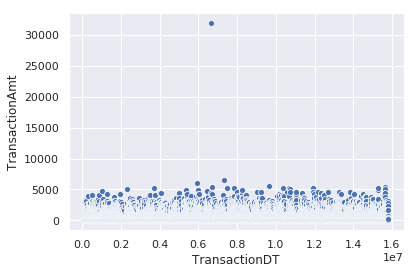

In [8]:
#Poloting amt spent during the period

import seaborn as sns
sns.set(style="darkgrid")

sns.scatterplot(x='TransactionDT',y='TransactionAmt',data=df_train_transaction)

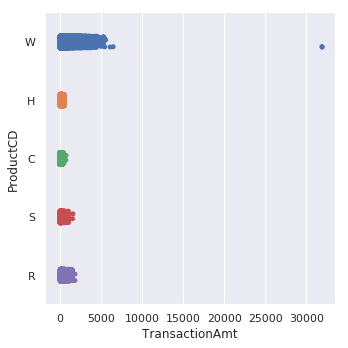

In [9]:
#Ploting categorical data. Getting around the value spent per product

sns.catplot(x="TransactionAmt",y="ProductCD",data=df_train_transaction)


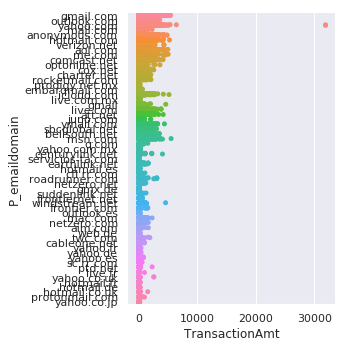

In [10]:
#Ploting categorical data. Getting around the value spent per e-mail domain
sns.catplot(x="TransactionAmt",y="P_emaildomain",data=df_train_transaction)


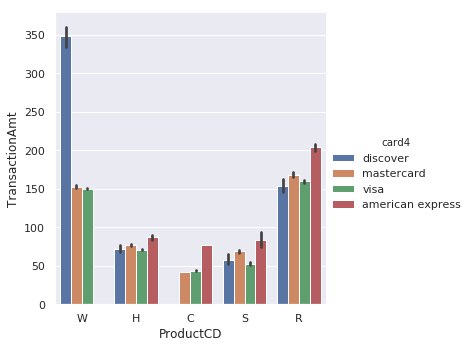

In [11]:
#Ploting categorical data. Getting around the value spent per product per type of card provider

sns.catplot(x="ProductCD",y="TransactionAmt", hue='card4', kind='bar',data=df_train_transaction)


In [12]:

#Merging Transaction and Identity Dataset

df_train_transaction.shape
df_train_identity.shape

df_all_dataset = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_all_dataset.shape

(590540, 434)

In [13]:
# % of fraud transaction regarding all transactions

perc_fraud_transactions = len(df_all_dataset[df_all_dataset["isFraud"]==1])/len(df_all_dataset)*100
print(perc_fraud_transactions)


3.4990009144173126


Warning: Regarding that fraudlent transactions is so low, 3.49%, we need to pay more attention because if a model predict 95% with ZERO does not mean that is a good model.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

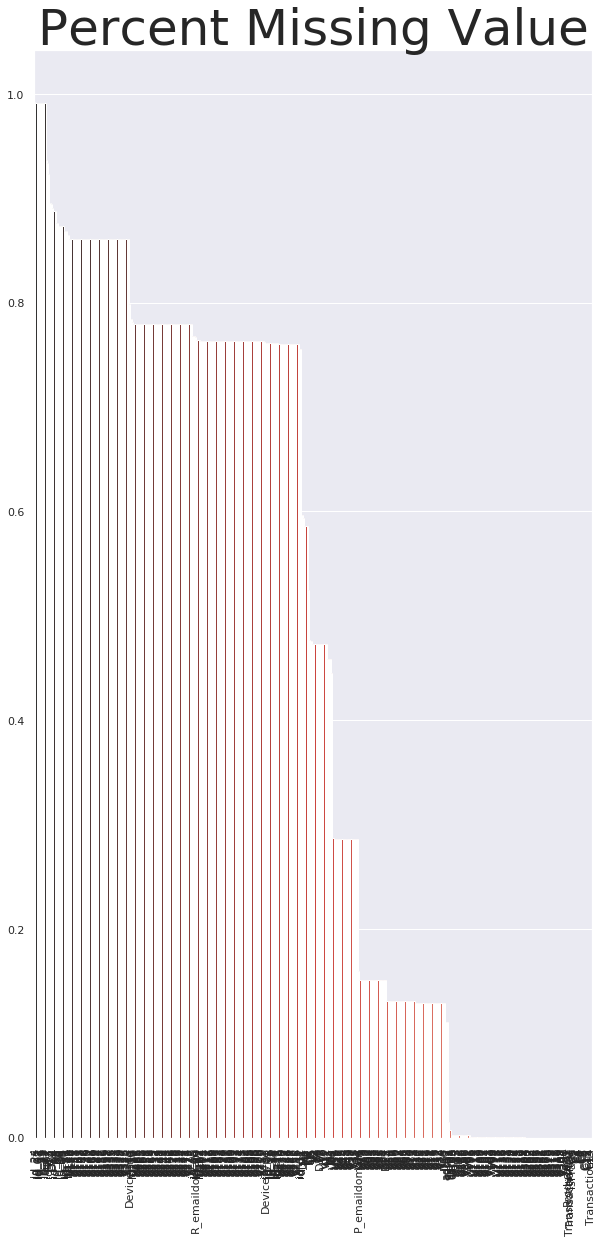

In [14]:
#Checking NA Values
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.barplot(y=df_all_dataset.isnull().sum().sort_values(ascending=False)/len(df_all_dataset),
            x=df_all_dataset.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

## 2.0 - Preparing Dataset

In [15]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import math
from copy import deepcopy
from datetime import datetime
import scipy.stats as stats


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Due the size of the dataset, lets reduce memory usage.

In [16]:
#all credit to Kartik Athale (https://www.kaggle.com/kartikathale/fraud-detection-eda-basic-logistic-regression)

train= pd.merge(df_train_transaction,df_train_identity,how="left",on="TransactionID")
test = pd.merge(df_test_transaction,df_test_identity,how="left",on="TransactionID")


def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

train=reduce_mem_usage(train)
test=reduce_mem_usage(test)

del df_train_transaction
del df_train_identity
del df_test_transaction
del df_test_identity


train_df = train.copy()
test_df = test.copy()

print('memory reduction complete')


Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)
memory reduction complete


In [0]:

train = train_df.copy()
test = test_df.copy()

In [0]:
#split training targets and data.  remove transaction ID from training and split isFraud to represent the 'y' vector.

train_y = train['isFraud']
train = train.drop(['isFraud','TransactionID'], axis=1)
test = test.drop(['TransactionID'], axis = 1)

In [0]:
#preprocessing (docs appear to describe one-hot encoding: taking training and test data field which are non-numeric and encoding a number to show if being used).
#credit to https://github.com/mikeyj777/siraj_week3_frauddetection/blob/master/siraj_week3_frauddetection.ipynb

for f in train.columns:
    if train[f].dtype=='object' or test[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))

Checking Categorical data encoded:

In [20]:
print(train)

        TransactionDT  TransactionAmt  ProductCD  ...  id_38  DeviceType  DeviceInfo
0               86400       68.500000          4  ...      2           2        2740
1               86401       29.000000          4  ...      2           2        2740
2               86469       59.000000          4  ...      2           2        2740
3               86499       50.000000          4  ...      2           2        2740
4               86506       50.000000          1  ...      1           1        1565
5               86510       49.000000          4  ...      2           2        2740
6               86522      159.000000          4  ...      2           2        2740
7               86529      422.500000          4  ...      2           2        2740
8               86535       15.000000          1  ...      1           1        2693
9               86536      117.000000          4  ...      2           2        2740
10              86549       75.875000          0  ...      1     

Actions: 
- Drop columns which contains % of nulls more than 60%
- Replace NaNs values for -999

In [21]:
### remove crap columns.  Fill NaNs and infs  
#more credit to Kartik and mikeyj777

null_percent = train.isnull().sum()/train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 60].index)

def trimandfillnanandinfs(df, cols_to_drop):
    df = df.drop(cols_to_drop, axis=1)
    df = df.fillna(value=-9999)
    df = df.replace([np.inf, -np.inf], -9999)
    return df

train = trimandfillnanandinfs(train, cols_to_drop)
test = trimandfillnanandinfs(test, cols_to_drop)
print(cols_to_drop)

['dist2' 'D6' 'D7' 'D8' 'D9' 'D12' 'D13' 'D14' 'V138' 'V139' 'V140' 'V141'
 'V142' 'V143' 'V144' 'V145' 'V146' 'V147' 'V148' 'V149' 'V150' 'V151'
 'V152' 'V153' 'V154' 'V155' 'V156' 'V157' 'V158' 'V159' 'V160' 'V161'
 'V162' 'V163' 'V164' 'V165' 'V166' 'V167' 'V168' 'V169' 'V170' 'V171'
 'V172' 'V173' 'V174' 'V175' 'V176' 'V177' 'V178' 'V179' 'V180' 'V181'
 'V182' 'V183' 'V184' 'V185' 'V186' 'V187' 'V188' 'V189' 'V190' 'V191'
 'V192' 'V193' 'V194' 'V195' 'V196' 'V197' 'V198' 'V199' 'V200' 'V201'
 'V202' 'V203' 'V204' 'V205' 'V206' 'V207' 'V208' 'V209' 'V210' 'V211'
 'V212' 'V213' 'V214' 'V215' 'V216' 'V217' 'V218' 'V219' 'V220' 'V221'
 'V222' 'V223' 'V224' 'V225' 'V226' 'V227' 'V228' 'V229' 'V230' 'V231'
 'V232' 'V233' 'V234' 'V235' 'V236' 'V237' 'V238' 'V239' 'V240' 'V241'
 'V242' 'V243' 'V244' 'V245' 'V246' 'V247' 'V248' 'V249' 'V250' 'V251'
 'V252' 'V253' 'V254' 'V255' 'V256' 'V257' 'V258' 'V259' 'V260' 'V261'
 'V262' 'V263' 'V264' 'V265' 'V266' 'V267' 'V268' 'V269' 'V270' 'V271'
 '

Normalizing the data

In [22]:
test.isna()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,...,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [23]:
#https://www.data-blogger.com/2017/06/15/fraud-detection-a-simple-machine-learning-approach/

from sklearn import preprocessing

#normalizing old school way
#def normalize(df):
 # floats = ['float16', 'float32', 'float64']
  #for col in df.columns:
   # col_type = df[col].dtypes
    #if col_type in floats:
     # print(col, df[col].mean(), df[col].std())
      #df[col] -= df[col].mean()
      #df[col] /= df[col].std()
  #return df

#normalizing fast way
def normalize(df):
  x = df.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df = pd.DataFrame(x_scaled)
  return df
  
train = normalize(train)
print('_____')
test = normalize(test)

_____


In [24]:
train_X = train.copy()
test_X = test.copy()
test_y = np.ones(test_X.shape[0])

print(train_y.head())


0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int8


2.0 - Trainning Logistic Regression Model

In [25]:
mses = []
models = []

for tol_mag in range(3,11):
    print("new model")
    t0 = datetime.now()
    model = LogisticRegression(tol=10**-tol_mag)
    print("time to instantiate: ", datetime.now()-t0)
    t1 = datetime.now()
    model.fit(train_X, train_y)
    t2 = datetime.now()
    print("time to fit: ", t2-t1)
    pred = model.predict(test_X)
    print("time to predict: ", datetime.now()-t2)
    mse = mean_squared_error(test_y, pred)
    print(tol_mag, mse)
    mses.append(mse)
    #including a model obj in models array
    models.append(deepcopy(model))

new model
time to instantiate:  0:00:00.000047


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:04:31.384910
time to predict:  0:00:00.171271
3 0.9918115774702926
new model
time to instantiate:  0:00:00.000036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:04:34.890271
time to predict:  0:00:00.164400
4 0.9938305594533947
new model
time to instantiate:  0:00:00.000036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:05:28.214860
time to predict:  0:00:00.163116
5 0.9944917119112042
new model
time to instantiate:  0:00:00.000035


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:06:27.282807
time to predict:  0:00:00.165634
6 0.9944147419235787
new model
time to instantiate:  0:00:00.000034


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:07:37.682158
time to predict:  0:00:00.891008
7 0.9944226362812839
new model
time to instantiate:  0:00:00.000035


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:08:39.515348
time to predict:  0:00:00.228240
8 0.9944226362812839
new model
time to instantiate:  0:00:00.000036


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:09:49.159151
time to predict:  0:00:00.253669
9 0.9944226362812839
new model
time to instantiate:  0:00:00.000039


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


time to fit:  0:09:50.932548
time to predict:  0:00:00.189637
10 0.9944226362812839


In [52]:
mses

[0.9918115774702926,
 0.9938305594533947,
 0.9944917119112042,
 0.9944147419235787,
 0.9944226362812839,
 0.9944226362812839,
 0.9944226362812839,
 0.9944226362812839]